
Trabalho BI 

Prof: Leonardo Mendonza

Aluna: Mayta S. Custodio

Matrícula: 192671147

Período: 2019.2

Diretrizes do trabalho:

1-	 A base do trabalho são todas as reclamações fundamentadas que foram audiência no ano de 2017. 

2-	Por favor crie uma wordcloud para empresa e para estado e outra para serviço com intuito de saber qual é a empresa com mais reclamações.

3-	No problema retire os dados null, faça uma tokenização e logo um stopwords crie depois uma wordcloud. 


In [0]:
import pandas as pd

In [266]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
workdir_path = '/content/drive/My Drive/BI_Trabalho' 
os.chdir(workdir_path)

In [268]:
!ls

 alicemask.png				 reclamações_problema.jpg
'base reclamacoes  original(1).xlsx'	 reclamações_serviços.jpg
 basetrabalhoBI.csv			 reclamações_stormtrooper.jpg
'BI - Aula 07 - Prof.Leonardo Mendoza'	 reclamações_twitterEstadoMask.jpg
 flower_mask.png			 reclamações_twittermask.jpg
 leaf_mark.png				 reclamações_wine_mask.jpg
 nuvem_mask.png				 reclamações_winemask.jpg
 reclamações_alice.jpg			 recomendação_de_musica.ipynb
 reclamações_empresa.jpg		 singing_mask.jpg
 reclamações_estado.jpg			 stormtrooper_mask.png
 reclamações.jpg			'Trabalho BI2019.docx'
 reclamações_liefmask.jpg		 twitter_mank.jpg
 reclamações_nuvemmask.jpg		 wine_mask.png


In [269]:
# Carregando a base em excel, pois deu problema no encode do csv

data = pd.read_excel('base reclamacoes  original(1).xlsx')
data.head()

,Regiao,estado,empresa,subsidiaria,area,serviço,problema,faixa etarea
0,Sudeste,SP,ITAÚ UNIBANCO S/A,BANCO ITAÚ/BANCO UNIBANCO,"BANCOS MÚLTIPLOS, COM CARTEIRA COMERCIAL",Outros Contratos,"Contrato (não cumprimento, alteração, transfer...",entre 31 a 40 anos
1,Sudeste,SP,CLARO S/A,NET,NaN,Telefonia Fixa ( Plano de Expansão / Compra e ...,Contrato - Rescisão/alteração unilateral,mais de 70 anos
2,Sudeste,SP,ELETROPAULO METROPOLITANA ELETRICIDADE DE S PAULO,ELETROPAULO METROPOLITANA,DISTRIBUIÇÃO DE ENERGIA ELÉTRICA,Energia Elétrica,PID - Pedido de Indenização por Danos Morais,entre 31 a 40 anos
3,Sudeste,SP,GNN GARAGENS LTDA - EPP,NETPARK.COM.BR,ESTACIONAMENTO DE VEÍCULOS,"Estacionamento ( Particular, Supermercado, Sho...","Vicio de qualidade (mal executado, inadequado,...",entre 31 a 40 anos
4,Sudeste,SP,CLARO S/A,CLARO / NET / EMBRATEL / CLAROTV,TELEFONIA MÓVEL CELULAR,Telefonia Fixa ( Plano de Expansão / Compra e ...,"Vicio de qualidade (mal executado, inadequado,...",entre 41 a 50 anos


In [270]:
# Quantidade de linhas
#podendo também ser:
#len(data)
print(data.shape[0])

42307


In [271]:
#Confirmando o tipo do database como Dataframe

type(data)

pandas.core.frame.DataFrame

In [272]:
# Descrição geral do database

data.describe()


,Regiao,estado,empresa,subsidiaria,area,serviço,problema,faixa etarea
count,42307,42307,42306,35777,36978,42307,33371,42307
unique,5,17,11214,8864,556,193,167,8
top,Centro-oeste,SP,TELEFONICA BRASIL S/A,VIVO/TELEFÔNICA,"BANCOS MÚLTIPLOS, COM CARTEIRA COMERCIAL","Telefone ( Convencional, Celular, Interfone, E...",Produto com vício,entre 31 a 40 anos
freq,16459,8127,846,799,3635,5149,6043,9372


In [273]:
# Consultando valores nulos por coluna

print(data.isnull().any())

Regiao           False
estado           False
empresa           True
subsidiaria       True
area              True
serviço          False
problema          True
faixa etarea     False
dtype: bool


In [274]:
# Informações gerais do database

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42307 entries, 0 to 42306
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Regiao         42307 non-null  object
 1   estado         42307 non-null  object
 2   empresa        42306 non-null  object
 3   subsidiaria    35777 non-null  object
 4   area           36978 non-null  object
 5   serviço        42307 non-null  object
 6   problema       33371 non-null  object
 7   faixa etarea   42307 non-null  object
dtypes: object(8)
memory usage: 2.6+ MB


In [275]:
# Removendo null (missing data)

data = data.dropna()
data.head()

,Regiao,estado,empresa,subsidiaria,area,serviço,problema,faixa etarea
0,Sudeste,SP,ITAÚ UNIBANCO S/A,BANCO ITAÚ/BANCO UNIBANCO,"BANCOS MÚLTIPLOS, COM CARTEIRA COMERCIAL",Outros Contratos,"Contrato (não cumprimento, alteração, transfer...",entre 31 a 40 anos
2,Sudeste,SP,ELETROPAULO METROPOLITANA ELETRICIDADE DE S PAULO,ELETROPAULO METROPOLITANA,DISTRIBUIÇÃO DE ENERGIA ELÉTRICA,Energia Elétrica,PID - Pedido de Indenização por Danos Morais,entre 31 a 40 anos
3,Sudeste,SP,GNN GARAGENS LTDA - EPP,NETPARK.COM.BR,ESTACIONAMENTO DE VEÍCULOS,"Estacionamento ( Particular, Supermercado, Sho...","Vicio de qualidade (mal executado, inadequado,...",entre 31 a 40 anos
4,Sudeste,SP,CLARO S/A,CLARO / NET / EMBRATEL / CLAROTV,TELEFONIA MÓVEL CELULAR,Telefonia Fixa ( Plano de Expansão / Compra e ...,"Vicio de qualidade (mal executado, inadequado,...",entre 41 a 50 anos
5,Sudeste,SP,AEROVIAS DEL CONTINENTE AMERICANO S/A,AVIANCA INTERNACIONAL,TRANSPORTE AÉREO DE PASSAGEIROS REGULAR,Agências e Operadoras de viagens (pacotes turí...,Desistência do serviço (artigo 49 - descumprim...,entre 21 a 30 anos


In [276]:
# Nova consulta por nulls após tratamento para confirmar que não existem mais nulos
print(data.isnull().any())

Regiao           False
estado           False
empresa          False
subsidiaria      False
area             False
serviço          False
problema         False
faixa etarea     False
dtype: bool


In [277]:
# Resetar o index após a exclusão das linhas com NaN, salvando em uma nova vairável 'dados2'

data2 = data.reset_index(drop=True)
data2.head()

,Regiao,estado,empresa,subsidiaria,area,serviço,problema,faixa etarea
0,Sudeste,SP,ITAÚ UNIBANCO S/A,BANCO ITAÚ/BANCO UNIBANCO,"BANCOS MÚLTIPLOS, COM CARTEIRA COMERCIAL",Outros Contratos,"Contrato (não cumprimento, alteração, transfer...",entre 31 a 40 anos
1,Sudeste,SP,ELETROPAULO METROPOLITANA ELETRICIDADE DE S PAULO,ELETROPAULO METROPOLITANA,DISTRIBUIÇÃO DE ENERGIA ELÉTRICA,Energia Elétrica,PID - Pedido de Indenização por Danos Morais,entre 31 a 40 anos
2,Sudeste,SP,GNN GARAGENS LTDA - EPP,NETPARK.COM.BR,ESTACIONAMENTO DE VEÍCULOS,"Estacionamento ( Particular, Supermercado, Sho...","Vicio de qualidade (mal executado, inadequado,...",entre 31 a 40 anos
3,Sudeste,SP,CLARO S/A,CLARO / NET / EMBRATEL / CLAROTV,TELEFONIA MÓVEL CELULAR,Telefonia Fixa ( Plano de Expansão / Compra e ...,"Vicio de qualidade (mal executado, inadequado,...",entre 41 a 50 anos
4,Sudeste,SP,AEROVIAS DEL CONTINENTE AMERICANO S/A,AVIANCA INTERNACIONAL,TRANSPORTE AÉREO DE PASSAGEIROS REGULAR,Agências e Operadoras de viagens (pacotes turí...,Desistência do serviço (artigo 49 - descumprim...,entre 21 a 30 anos


In [278]:
# A coluna faixa etaria está com um espaço, o que pode acarretar em um erro no Pandas, renomeamos então a coluna para faixa_etaria

data3 = data2.rename(columns={'faixa etarea': 'faixa_etaria'})
data3.head()

,Regiao,estado,empresa,subsidiaria,area,serviço,problema,faixa_etaria
0,Sudeste,SP,ITAÚ UNIBANCO S/A,BANCO ITAÚ/BANCO UNIBANCO,"BANCOS MÚLTIPLOS, COM CARTEIRA COMERCIAL",Outros Contratos,"Contrato (não cumprimento, alteração, transfer...",entre 31 a 40 anos
1,Sudeste,SP,ELETROPAULO METROPOLITANA ELETRICIDADE DE S PAULO,ELETROPAULO METROPOLITANA,DISTRIBUIÇÃO DE ENERGIA ELÉTRICA,Energia Elétrica,PID - Pedido de Indenização por Danos Morais,entre 31 a 40 anos
2,Sudeste,SP,GNN GARAGENS LTDA - EPP,NETPARK.COM.BR,ESTACIONAMENTO DE VEÍCULOS,"Estacionamento ( Particular, Supermercado, Sho...","Vicio de qualidade (mal executado, inadequado,...",entre 31 a 40 anos
3,Sudeste,SP,CLARO S/A,CLARO / NET / EMBRATEL / CLAROTV,TELEFONIA MÓVEL CELULAR,Telefonia Fixa ( Plano de Expansão / Compra e ...,"Vicio de qualidade (mal executado, inadequado,...",entre 41 a 50 anos
4,Sudeste,SP,AEROVIAS DEL CONTINENTE AMERICANO S/A,AVIANCA INTERNACIONAL,TRANSPORTE AÉREO DE PASSAGEIROS REGULAR,Agências e Operadoras de viagens (pacotes turí...,Desistência do serviço (artigo 49 - descumprim...,entre 21 a 30 anos


Algumas verificações na base
:

In [279]:
# Problemas(reclamações) x Faixa Etária

data3.faixa_etaria.value_counts()              #inteiro      

entre 31 a 40 anos    5395
entre 41 a 50 anos    4665
entre 21 a 30 anos    4063
entre 51 a 60 anos    4004
entre 61 a 70 anos    3006
Nao Informada         2232
mais de 70 anos       1372
até 20 anos            545
Name: faixa_etaria, dtype: int64

In [280]:
# Problemas(reclamações) x Faixa Etária

data3.faixa_etaria.value_counts(normalize=True)   #normalizado

entre 31 a 40 anos    0.213393
entre 41 a 50 anos    0.184519
entre 21 a 30 anos    0.160707
entre 51 a 60 anos    0.158374
entre 61 a 70 anos    0.118899
Nao Informada         0.088284
mais de 70 anos       0.054268
até 20 anos           0.021557
Name: faixa_etaria, dtype: float64

In [281]:
# Contagem de tamanho do relato dos problemas. Temos 5317 com o tamanho de 25 caracteres no topo da lista

data3.problema.map(len).value_counts()


25    5317
17    4502
18    2722
40    1535
39    1393
      ... 
8        2
53       1
73       1
42       1
62       1
Name: problema, Length: 78, dtype: int64

In [282]:
# Transformando todas os caracteres para minúsculo nas colunas referentes ao trabalho e também, ao problema como 'extra'

import re

lower_alpha = lambda x:re.sub(r"""\w*\d\w*""", ' ', x.lower())
data3['estado'] = data3.estado.map(lower_alpha)
data3['empresa'] = data3.empresa.map(lower_alpha)
data3['serviço'] = data3.serviço.map(lower_alpha)
data3['problema'] = data3.problema.map(lower_alpha)

data3.head()

,Regiao,estado,empresa,subsidiaria,area,serviço,problema,faixa_etaria
0,Sudeste,sp,itaú unibanco s/a,BANCO ITAÚ/BANCO UNIBANCO,"BANCOS MÚLTIPLOS, COM CARTEIRA COMERCIAL",outros contratos,"contrato (não cumprimento, alteração, transfer...",entre 31 a 40 anos
1,Sudeste,sp,eletropaulo metropolitana eletricidade de s paulo,ELETROPAULO METROPOLITANA,DISTRIBUIÇÃO DE ENERGIA ELÉTRICA,energia elétrica,pid - pedido de indenização por danos morais,entre 31 a 40 anos
2,Sudeste,sp,gnn garagens ltda - epp,NETPARK.COM.BR,ESTACIONAMENTO DE VEÍCULOS,"estacionamento ( particular, supermercado, sho...","vicio de qualidade (mal executado, inadequado,...",entre 31 a 40 anos
3,Sudeste,sp,claro s/a,CLARO / NET / EMBRATEL / CLAROTV,TELEFONIA MÓVEL CELULAR,telefonia fixa ( plano de expansão / compra e ...,"vicio de qualidade (mal executado, inadequado,...",entre 41 a 50 anos
4,Sudeste,sp,aerovias del continente americano s/a,AVIANCA INTERNACIONAL,TRANSPORTE AÉREO DE PASSAGEIROS REGULAR,agências e operadoras de viagens (pacotes turí...,desistência do serviço (artigo - descumprime...,entre 21 a 30 anos


In [283]:
# Retirando as pontuações, menos de 'Estado' que já verifiquei que não possui

import string

punc_re = lambda x:re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
data3['empresa'] = data3.empresa.map(punc_re)
data3['serviço'] = data3.serviço.map(punc_re)
data3['problema'] = data3.problema.map(punc_re)

data3.head()

,Regiao,estado,empresa,subsidiaria,area,serviço,problema,faixa_etaria
0,Sudeste,sp,itaú unibanco s a,BANCO ITAÚ/BANCO UNIBANCO,"BANCOS MÚLTIPLOS, COM CARTEIRA COMERCIAL",outros contratos,contrato não cumprimento alteração transfer...,entre 31 a 40 anos
1,Sudeste,sp,eletropaulo metropolitana eletricidade de s paulo,ELETROPAULO METROPOLITANA,DISTRIBUIÇÃO DE ENERGIA ELÉTRICA,energia elétrica,pid pedido de indenização por danos morais,entre 31 a 40 anos
2,Sudeste,sp,gnn garagens ltda epp,NETPARK.COM.BR,ESTACIONAMENTO DE VEÍCULOS,estacionamento particular supermercado sho...,vicio de qualidade mal executado inadequado ...,entre 31 a 40 anos
3,Sudeste,sp,claro s a,CLARO / NET / EMBRATEL / CLAROTV,TELEFONIA MÓVEL CELULAR,telefonia fixa plano de expansão compra e ...,vicio de qualidade mal executado inadequado ...,entre 41 a 50 anos
4,Sudeste,sp,aerovias del continente americano s a,AVIANCA INTERNACIONAL,TRANSPORTE AÉREO DE PASSAGEIROS REGULAR,agências e operadoras de viagens pacotes turí...,desistência do serviço artigo descumprime...,entre 21 a 30 anos


In [284]:
# Último review para verificar se sobrou algum sinal ou pontuação a retirar, com uma linha de informação

data3.iloc[1,:]

Regiao                                                     Sudeste
estado                                                          sp
empresa          eletropaulo metropolitana eletricidade de s paulo
subsidiaria                              ELETROPAULO METROPOLITANA
area                              DISTRIBUIÇÃO DE ENERGIA ELÉTRICA
serviço                                           energia elétrica
problema              pid   pedido de indenização por danos morais
faixa_etaria                                    entre 31 a 40 anos
Name: 1, dtype: object

In [286]:
# Tokenizando
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [287]:
data3['tokens_estado'] = data3.estado.map(word_tokenize)
data3['tokens_empresa'] = data3.empresa.map(word_tokenize)
data3['tokens_serviço'] = data3.serviço.map(word_tokenize)
data3['tokens_problema'] = data3.problema.map(word_tokenize)

data3.head()

,Regiao,estado,empresa,subsidiaria,area,serviço,problema,faixa_etaria,tokens_estado,tokens_empresa,tokens_serviço,tokens_problema
0,Sudeste,sp,itaú unibanco s a,BANCO ITAÚ/BANCO UNIBANCO,"BANCOS MÚLTIPLOS, COM CARTEIRA COMERCIAL",outros contratos,contrato não cumprimento alteração transfer...,entre 31 a 40 anos,[sp],"[itaú, unibanco, s, a]","[outros, contratos]","[contrato, não, cumprimento, alteração, transf..."
1,Sudeste,sp,eletropaulo metropolitana eletricidade de s paulo,ELETROPAULO METROPOLITANA,DISTRIBUIÇÃO DE ENERGIA ELÉTRICA,energia elétrica,pid pedido de indenização por danos morais,entre 31 a 40 anos,[sp],"[eletropaulo, metropolitana, eletricidade, de,...","[energia, elétrica]","[pid, pedido, de, indenização, por, danos, mor..."
2,Sudeste,sp,gnn garagens ltda epp,NETPARK.COM.BR,ESTACIONAMENTO DE VEÍCULOS,estacionamento particular supermercado sho...,vicio de qualidade mal executado inadequado ...,entre 31 a 40 anos,[sp],"[gnn, garagens, ltda, epp]","[estacionamento, particular, supermercado, sho...","[vicio, de, qualidade, mal, executado, inadequ..."
3,Sudeste,sp,claro s a,CLARO / NET / EMBRATEL / CLAROTV,TELEFONIA MÓVEL CELULAR,telefonia fixa plano de expansão compra e ...,vicio de qualidade mal executado inadequado ...,entre 41 a 50 anos,[sp],"[claro, s, a]","[telefonia, fixa, plano, de, expansão, compra,...","[vicio, de, qualidade, mal, executado, inadequ..."
4,Sudeste,sp,aerovias del continente americano s a,AVIANCA INTERNACIONAL,TRANSPORTE AÉREO DE PASSAGEIROS REGULAR,agências e operadoras de viagens pacotes turí...,desistência do serviço artigo descumprime...,entre 21 a 30 anos,[sp],"[aerovias, del, continente, americano, s, a]","[agências, e, operadoras, de, viagens, pacotes...","[desistência, do, serviço, artigo, descumprime..."


In [288]:
# Criando uma lista de valores da coluna tokens e consultando uma amostra de 10

word_list_estado = sum(data3.tokens_estado.tolist(), [])
d = word_list_estado
word_list_estado[:20]

['sp',
 'sp',
 'sp',
 'sp',
 'sp',
 'sp',
 'sp',
 'sp',
 'sp',
 'sp',
 'sp',
 'sp',
 'sp',
 'sp',
 'sp',
 'sp',
 'sp',
 'sp',
 'sp',
 'sp']

In [289]:
word_list_empresa = sum(data3.tokens_empresa.tolist(), [])

word_list_empresa[:10]

['itaú',
 'unibanco',
 's',
 'a',
 'eletropaulo',
 'metropolitana',
 'eletricidade',
 'de',
 's',
 'paulo']

In [290]:
word_list_serviço = sum(data3.tokens_serviço.tolist(), [])

word_list_serviço[:10]

['outros',
 'contratos',
 'energia',
 'elétrica',
 'estacionamento',
 'particular',
 'supermercado',
 'shopping',
 'etc',
 'telefonia']

In [291]:
word_list_problema = sum(data3.tokens_problema.tolist(), [])

word_list_problema[:10]

['contrato',
 'não',
 'cumprimento',
 'alteração',
 'transferencia',
 'irregularidade',
 'rescisão',
 'etc',
 'pid',
 'pedido']

In [292]:
# Verificando os Estados mais comuns

from collections import Counter

# Converter a lista em um dicionário com contagem de valores

word_counts_estado = Counter(word_list_estado)

# Inverter a chave/valores no dicionário

word_counts_estado = list(zip(word_counts_estado.values(), word_counts_estado.keys()))

# Classificar a lista por contagem

word_counts_estado = sorted(word_counts_estado, reverse = True)

# Imprimir as 20 palavras mais comuns

word_counts_estado[:20]

[(5701, 'sp'),
 (3691, 'ms'),
 (3224, 'go'),
 (2605, 'mt'),
 (1895, 'pi'),
 (1730, 'rn'),
 (1455, 'mg'),
 (1336, 'ro'),
 (1256, 'ce'),
 (983, 'sc'),
 (535, 'es'),
 (529, 'to'),
 (233, 'pb'),
 (66, 'rs'),
 (39, 'ma'),
 (3, 'pa'),
 (1, 'pe')]

In [293]:
# Verificando as Empresas mais citadas

from collections import Counter

# Converter a lista em um dicionário com contagem de valores

word_counts_empresa = Counter(word_list_empresa)

# Inverter a chave/valores no dicionário

word_counts_empresa = list(zip(word_counts_empresa.values(), word_counts_empresa.keys()))

# Classificar a lista por contagem

word_counts_empresa = sorted(word_counts_empresa, reverse = True)

# Imprimir as 20 palavras mais comuns

word_counts_empresa[:20]

[(11753, 's'),
 (11238, 'a'),
 (7985, 'ltda'),
 (5395, 'de'),
 (4177, 'brasil'),
 (3449, 'e'),
 (2666, 'banco'),
 (2533, 'do'),
 (1394, 'sa'),
 (1375, 'comercio'),
 (1159, 'me'),
 (1126, 'telefonica'),
 (1126, 'oi'),
 (922, 'companhia'),
 (794, 'claro'),
 (763, 'da'),
 (698, 'celular'),
 (666, 'bradesco'),
 (653, 'seguros'),
 (619, 'tim')]

In [294]:
# Verificando os Serviços mais comuns

from collections import Counter

# Converter a lista em um dicionário com contagem de valores

word_counts_serviço = Counter(word_list_serviço)

# Inverter a chave/valores no dicionário

word_counts_serviço = list(zip(word_counts_serviço.values(), word_counts_serviço.keys()))

# Classificar a lista por contagem

word_counts_serviço = sorted(word_counts_serviço, reverse = True)

# Imprimir as 20 palavras mais comuns

word_counts_serviço[:20]

[(8333, 'de'),
 (5320, 'celular'),
 (5131, 'etc'),
 (4606, 'e'),
 (4391, 'telefonia'),
 (3050, 'telefone'),
 (3050, 'interfone'),
 (3050, 'convencional'),
 (2313, 'plano'),
 (2258, 'locação'),
 (2199, 'compra'),
 (2125, 'venda'),
 (2107, 'fixa'),
 (2107, 'expansão'),
 (1899, 'outros'),
 (1849, 'cartão'),
 (1553, 'comercial'),
 (1502, 'banco'),
 (1489, 'elétrica'),
 (1429, 'energia')]

In [295]:
# Verificando os problemas mais comuns

from collections import Counter

# Converter a lista em um dicionário com contagem de valores

word_counts_problema = Counter(word_list_problema)

# Inverter a chave/valores no dicionário

word_counts_problema = list(zip(word_counts_problema.values(), word_counts_problema.keys()))

# Classificar a lista por contagem

word_counts_problema = sorted(word_counts_problema, reverse = True)

# Imprimir as 20 palavras mais comuns

word_counts_problema[:20]

[(8162, 'cobrança'),
 (7156, 'indevida'),
 (5877, 'de'),
 (5635, 'produto'),
 (4874, 'não'),
 (4772, 'com'),
 (4519, 'vício'),
 (4294, 'abusiva'),
 (3495, 'contrato'),
 (3203, 'etc'),
 (2436, 'entrega'),
 (2009, 'rescisão'),
 (1945, 'serviço'),
 (1769, 'do'),
 (1729, 'cumprimento'),
 (1673, 'alteração'),
 (1435, 'e'),
 (1189, 'peso'),
 (1186, 'volume'),
 (1186, 'quantidade')]

In [296]:
# Removendo as stop words e incluindo a eliminação da palavra 'etc, s, ltda' que não está na lista em Português, excluindo a coluna Estado

from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = stopwords.words('portuguese')
stop_words += ["etc", "s", "ltda"]

stop_lambda = lambda x: [z for z in x if z not in stop_words]
data3['tokens_stop_empresa'] = data3.tokens_empresa.apply(stop_lambda)
data3['tokens_stop_serviço'] = data3.tokens_serviço.apply(stop_lambda)
data3['tokens_stop_problema'] = data3.tokens_problema.apply(stop_lambda)


data3.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Regiao,estado,empresa,subsidiaria,area,serviço,problema,faixa_etaria,tokens_estado,tokens_empresa,tokens_serviço,tokens_problema,tokens_stop_empresa,tokens_stop_serviço,tokens_stop_problema
0,Sudeste,sp,itaú unibanco s a,BANCO ITAÚ/BANCO UNIBANCO,"BANCOS MÚLTIPLOS, COM CARTEIRA COMERCIAL",outros contratos,contrato não cumprimento alteração transfer...,entre 31 a 40 anos,[sp],"[itaú, unibanco, s, a]","[outros, contratos]","[contrato, não, cumprimento, alteração, transf...","[itaú, unibanco]","[outros, contratos]","[contrato, cumprimento, alteração, transferenc..."
1,Sudeste,sp,eletropaulo metropolitana eletricidade de s paulo,ELETROPAULO METROPOLITANA,DISTRIBUIÇÃO DE ENERGIA ELÉTRICA,energia elétrica,pid pedido de indenização por danos morais,entre 31 a 40 anos,[sp],"[eletropaulo, metropolitana, eletricidade, de,...","[energia, elétrica]","[pid, pedido, de, indenização, por, danos, mor...","[eletropaulo, metropolitana, eletricidade, paulo]","[energia, elétrica]","[pid, pedido, indenização, danos, morais]"
2,Sudeste,sp,gnn garagens ltda epp,NETPARK.COM.BR,ESTACIONAMENTO DE VEÍCULOS,estacionamento particular supermercado sho...,vicio de qualidade mal executado inadequado ...,entre 31 a 40 anos,[sp],"[gnn, garagens, ltda, epp]","[estacionamento, particular, supermercado, sho...","[vicio, de, qualidade, mal, executado, inadequ...","[gnn, garagens, epp]","[estacionamento, particular, supermercado, sho...","[vicio, qualidade, mal, executado, inadequado,..."
3,Sudeste,sp,claro s a,CLARO / NET / EMBRATEL / CLAROTV,TELEFONIA MÓVEL CELULAR,telefonia fixa plano de expansão compra e ...,vicio de qualidade mal executado inadequado ...,entre 41 a 50 anos,[sp],"[claro, s, a]","[telefonia, fixa, plano, de, expansão, compra,...","[vicio, de, qualidade, mal, executado, inadequ...",[claro],"[telefonia, fixa, plano, expansão, compra, ven...","[vicio, qualidade, mal, executado, inadequado,..."
4,Sudeste,sp,aerovias del continente americano s a,AVIANCA INTERNACIONAL,TRANSPORTE AÉREO DE PASSAGEIROS REGULAR,agências e operadoras de viagens pacotes turí...,desistência do serviço artigo descumprime...,entre 21 a 30 anos,[sp],"[aerovias, del, continente, americano, s, a]","[agências, e, operadoras, de, viagens, pacotes...","[desistência, do, serviço, artigo, descumprime...","[aerovias, del, continente, americano]","[agências, operadoras, viagens, pacotes, turís...","[desistência, serviço, artigo, descumprimento]"


In [297]:
# Verificando as 10 novas empresas mais comuns

word_list_clean_empresa = sum(data3.tokens_stop_empresa.tolist(), [])

word_list_clean_empresa[:10]

['itaú',
 'unibanco',
 'eletropaulo',
 'metropolitana',
 'eletricidade',
 'paulo',
 'gnn',
 'garagens',
 'epp',
 'claro']

In [298]:
# Verificando os 10 novos serviços mais comuns

word_list_clean_serviço = sum(data3.tokens_stop_serviço.tolist(), [])

word_list_clean_serviço[:10]

['outros',
 'contratos',
 'energia',
 'elétrica',
 'estacionamento',
 'particular',
 'supermercado',
 'shopping',
 'telefonia',
 'fixa']

In [299]:
# Verificando os 10 novos problemas mais comuns

word_list_clean_problema = sum(data3.tokens_stop_problema.tolist(), [])

word_list_clean_problema[:10]

['contrato',
 'cumprimento',
 'alteração',
 'transferencia',
 'irregularidade',
 'rescisão',
 'pid',
 'pedido',
 'indenização',
 'danos']

In [300]:
# Craindo um novo dicionário de Empresas

from collections import Counter

# Converter a lista em um novo dicionário com contagem de valores

word_counts_empresa= Counter(word_list_clean_empresa)
a = word_counts_empresa

# Inverter a chave/valores no dicionário

word_counts_empresa = list(zip(word_counts_empresa.values(), word_counts_empresa.keys()))

# Classificar a lista por contagem

word_counts_empresa = sorted(word_counts_empresa, reverse = True)

# Imprimir as novas 20 palavras mais comuns

word_counts_empresa[:20]

[(4177, 'brasil'),
 (2666, 'banco'),
 (1394, 'sa'),
 (1375, 'comercio'),
 (1126, 'telefonica'),
 (1126, 'oi'),
 (922, 'companhia'),
 (794, 'claro'),
 (698, 'celular'),
 (666, 'bradesco'),
 (653, 'seguros'),
 (619, 'tim'),
 (583, 'paulo'),
 (559, 'caixa'),
 (531, 'eletronica'),
 (529, 'federal'),
 (525, 'distribuidora'),
 (522, 'varejo'),
 (514, 'motorola'),
 (505, 'moveis')]

In [301]:
# Craindo um novo dicionário de Serviços

from collections import Counter

# Converter a lista em um novo dicionário com contagem de valores

word_counts_serviço= Counter(word_list_clean_serviço)
b = word_counts_serviço

# Inverter a chave/valores no dicionário

word_counts_serviço = list(zip(word_counts_serviço.values(), word_counts_serviço.keys()))

# Classificar a lista por contagem

word_counts_serviço = sorted(word_counts_serviço, reverse = True)

# Imprimir as novas 20 palavras mais comuns

word_counts_serviço[:20]

[(5320, 'celular'),
 (4391, 'telefonia'),
 (3050, 'telefone'),
 (3050, 'interfone'),
 (3050, 'convencional'),
 (2313, 'plano'),
 (2258, 'locação'),
 (2199, 'compra'),
 (2125, 'venda'),
 (2107, 'fixa'),
 (2107, 'expansão'),
 (1899, 'outros'),
 (1849, 'cartão'),
 (1553, 'comercial'),
 (1502, 'banco'),
 (1489, 'elétrica'),
 (1429, 'energia'),
 (1381, 'crédito'),
 (1048, 'contratos'),
 (825, 'financeira')]

In [302]:
# Craindo um novo dicionário para Problema

from collections import Counter

# Converter a lista em um novo dicionário com contagem de valores

word_counts_problema = Counter(word_list_clean_problema)
c = word_counts_problema

# Inverter a chave/valores no dicionário

word_counts_problema = list(zip(word_counts_problema.values(), word_counts_problema.keys()))

# Classificar a lista por contagem

word_counts_problema = sorted(word_counts_problema, reverse = True)

# Imprimir as novas 20 palavras mais comuns

word_counts_problema[:20]

[(8162, 'cobrança'),
 (7156, 'indevida'),
 (5635, 'produto'),
 (4519, 'vício'),
 (4294, 'abusiva'),
 (3495, 'contrato'),
 (2436, 'entrega'),
 (2009, 'rescisão'),
 (1945, 'serviço'),
 (1729, 'cumprimento'),
 (1673, 'alteração'),
 (1189, 'peso'),
 (1186, 'volume'),
 (1186, 'quantidade'),
 (1144, 'garantia'),
 (1125, 'cobertura'),
 (1120, 'oferta'),
 (1093, 'abrangência'),
 (883, 'demora'),
 (873, 'irregularidade')]

In [303]:
# Craindo um novo dicionário para Estado

from collections import Counter

# Converter a lista em um novo dicionário com contagem de valores

word_counts_estado = Counter(word_list_clean_estado)
d = word_counts_estado

# Inverter a chave/valores no dicionário

word_counts_estado = list(zip(word_counts_estado.values(), word_counts_estado.keys()))

# Classificar a lista por contagem

word_counts_estado = sorted(word_counts_estado, reverse = True)

# Imprimir as novas 20 palavras mais comuns

word_counts_estado[:20]

[(5701, 'sp'),
 (3691, 'ms'),
 (3224, 'go'),
 (2605, 'mt'),
 (1895, 'pi'),
 (1730, 'rn'),
 (1455, 'mg'),
 (1336, 'ro'),
 (1256, 'ce'),
 (983, 'sc'),
 (535, 'es'),
 (529, 'to'),
 (233, 'pb'),
 (66, 'rs'),
 (39, 'ma'),
 (3, 'pa'),
 (1, 'pe')]

In [304]:
# Realizando o WordCloud

!pip install wordcloud

import matplotlib.pyplot as plt
from wordcloud import WordCloud

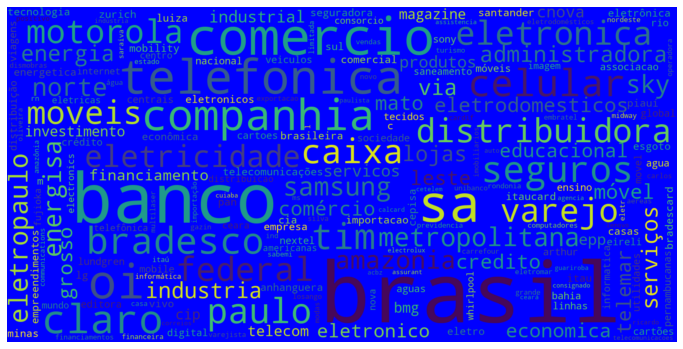

In [305]:
# WC - Empresa 

text = word_counts_empresa

wordcloud = WordCloud(width=1600, height=800, max_font_size=200, margin=3, 
                      background_color='blue', mode='RGB', contour_color='red',
                      contour_width=2).fit_words(a)


plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


wordcloud.to_file('reclamações_empresa.jpg')

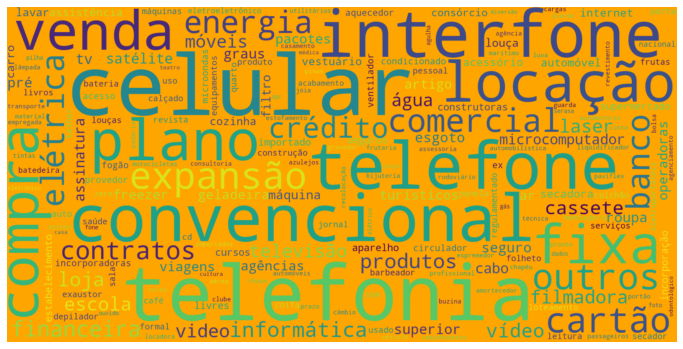

In [306]:
# WC - Serviço

text2 = word_counts_serviço

wordcloud = WordCloud(width=1600, height=800, max_font_size=200, margin=3, 
                      background_color='orange', mode='RGB', contour_color='red',
                      contour_width=2).fit_words(b)


plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


wordcloud.to_file('reclamações_serviços.jpg')

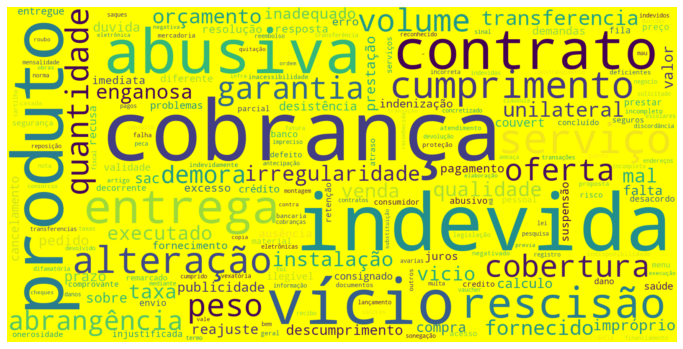

In [307]:
# WC - Problema

text3 = word_list_clean_problema

wordcloud = WordCloud(width=1600, height=800, max_font_size=200, margin=3,
                      background_color='yellow', mode='RGB', contour_color='red', 
                      contour_width=2).fit_words(c)


plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


wordcloud.to_file('reclamações_problema.jpg')

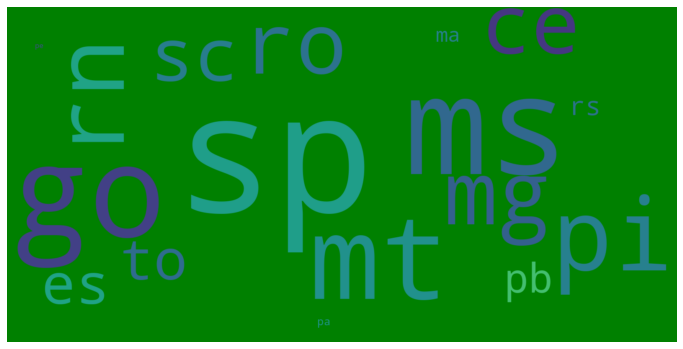

In [308]:
# WC - Estado

text4 = word_list_estado

wordcloud = WordCloud(width=1600, height=800, max_font_size=400, margin=3, 
                      background_color='green', mode='RGB', contour_color='red', 
                      contour_width=2).fit_words(d)


plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


wordcloud.to_file('reclamações_estado.jpg')

Uma forma diferente de representar o wordcloud

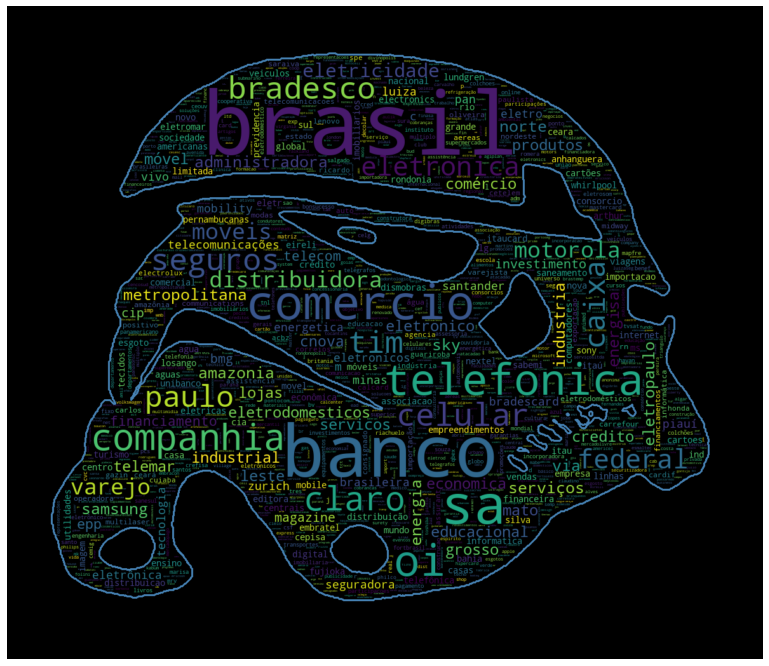

In [309]:
 
import numpy as np
from PIL import Image
 
stormtrooper = np.array(Image.open("/content/drive/My Drive/BI_Trabalho/stormtrooper_mask.png"))

wordcloud = WordCloud(width=1600, contour_width=3, contour_color="steelblue", height=800, 
                      max_font_size=600, mask=stormtrooper, background_color= "black",  
                      stopwords = stopwords, max_words=4000).fit_words(a)


plt.figure(figsize=(16,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


wordcloud.to_file('reclamações_stormtrooper.jpg')

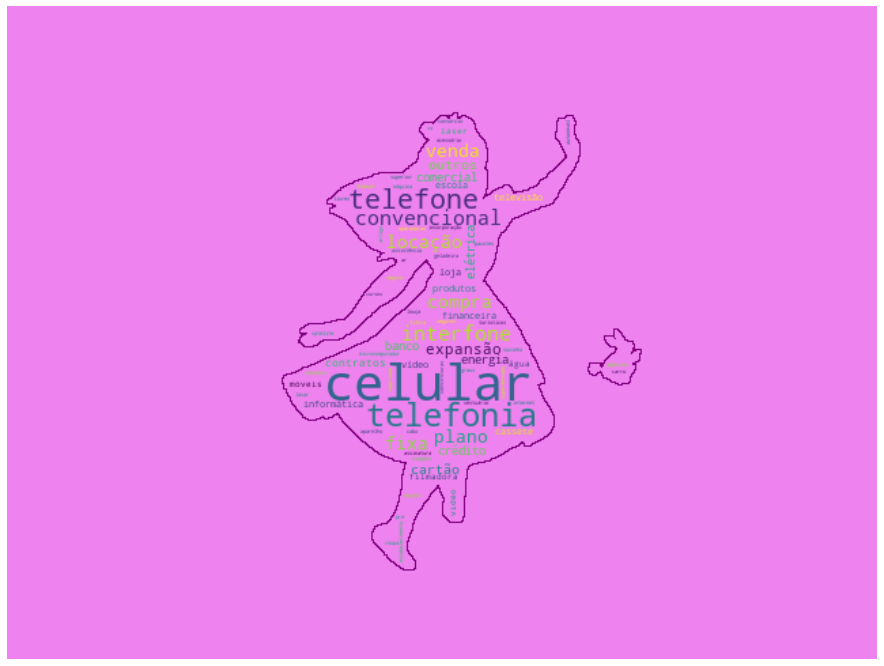

In [310]:
 
import numpy as np
from PIL import Image
 
alicemask = np.array(Image.open("/content/drive/My Drive/BI_Trabalho/alicemask.png"))

wordcloud = WordCloud(width=1600, contour_width=1, contour_color="purple", height=800, 
                      max_font_size=600, mask=alicemask, background_color= "violet",  
                      stopwords = stopwords, max_words=4000).fit_words(b)


plt.figure(figsize=(16,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


wordcloud.to_file('reclamações_alice.jpg')

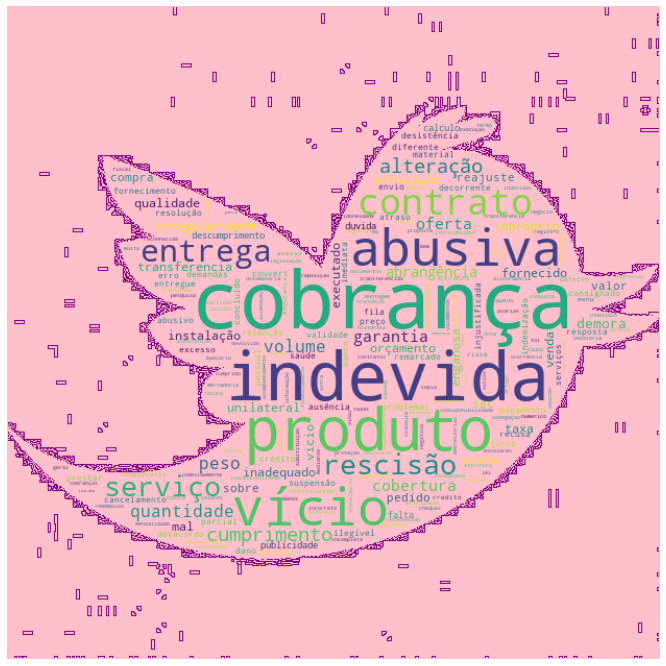

In [311]:

import numpy as np
from PIL import Image
 
twitter_mask = np.array(Image.open("/content/drive/My Drive/BI_Trabalho/twitter_mank.jpg"))

wordcloud = WordCloud(width=1600, contour_width=0.5, contour_color="purple", height=800, 
                      max_font_size=600, mask=twitter_mask, background_color= "pink",  
                      stopwords = stopwords, max_words=4000).fit_words(c)


plt.figure(figsize=(16,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


wordcloud.to_file('reclamações_twittermask.jpg')

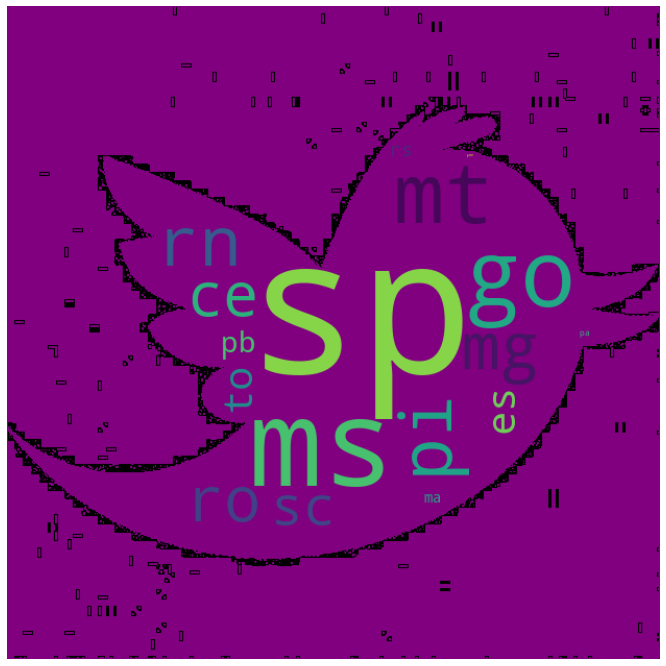

In [312]:
# Uma forma diferente de representar o wordcloud
 
import numpy as np
from PIL import Image
 
twitter_mask = np.array(Image.open("/content/drive/My Drive/BI_Trabalho/twitter_mank.jpg"))

wordcloud = WordCloud(width=1600, contour_width=1, contour_color="black", height=800, 
                      max_font_size=600, mask=twitter_mask, background_color= "purple",  
                      stopwords = stopwords, max_words=4000).fit_words(d)


plt.figure(figsize=(16,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


wordcloud.to_file('reclamações_twitterEstadoMask.jpg')

In [0]:
:)
